# Umsetzung in Python

## Vorarbeiten

Bevor wir loslegen, müssen zunächst Module importiert werden, die wir im Rahmen der Analyse benötigen. Im Kapitel [04 Module](../chapter_04/Intro_Modules.ipynb) werden wir die Hintergründe hierzu erläutern. Python (wie die meistern Programmiersprachen) wird von Hause aus weitestgehend ohne Funktionalität für Datenanalyse oder Visualisierung bereitstellt. Die dafür benötigten Funktionen können dann jedoch via sogenannter Module importiert werden. Die einzelnen Module werden im weiteren Verlaufe des Skriptes bzw. der Lehrveranstaltung eingeführt und erläutert. 

In [1]:
# Modul `BusinessAnalytics` muss bei erster Nutzung zunächst installiert werden:
#  - google colab: via `!pip install BusinessAnalytics`
#  - jupyter notebook: via `%pip install BusinessAnalytics``
from BusinessAnalytics import get_stock_data, plot
import pandas as pd # Modul für DataFrames
import numpy as np
import matplotlib.pyplot as plt

## Schritt 1: Fragestellung

Dieser Schritt unterscheidet sich nicht von den konzeptionellen Überlegungen im [vorherigen Kapitel](Introduction_Fallstudie.md). Die konkrete Fragestellung lautet also:

**Wie wahrscheinlich ist es, dass wir bei einer Investition in den DAX einen Verlust nach X Jahren erleiden?**

Machen wir uns nun an die konkrete Beantwortung der Frage via Python

## Schritt 2: Beschaffung der Daten

Unsere Analyse fußt auf historischen Dax-Kursen. Diese müssen wir nun in Python einlesen. Hierfür gibt es prinzipiell zwei Ansätze (die dann auf verschiedene Art und Weisen umgesetzt werden können):

1. manuelles Herunterladen und Abspeichern der Daten als (z.B.) `csv`-Datei und dann einlesen der Datei
2. direktes Einlesen der Daten via Python-Code ohne Zwischenspeichern einer Datei

Prinzipiell haben beide Varianten Vor- und Nachteile. In [vorherigen Kapitel](Introduction_Fallstudie.md) wurde [hier](download-yahoo) aufgezeigt, wie wir die konkreten DAX-Daten als Datei abspeichern. In unserem Fall verzichten wir darauf und wählen Variante 2, d.h. wir laden die Daten direkt in Python. Wir müssen dafür den Yahoo-Ticker für den DAX (`^GDAXI`) sowie Start- und Enddatum der benötigten Daten angeben. 

In [2]:
data_dax = get_stock_data(ticker="^GDAXI", start="30-12-1987", end="31-07-2022")

Was macht der obige Programmcode? 

Mit der Funktion `get_stock_data` laden wir die Yahoo-Daten herunter. Das Ergebnis ist ein sog. `Dataframe` (stellen Sie sich eine Art Excel-Tabelle vor), in dem alle Yahoo-Daten gespeichert sind. Diesen Dataframe "speichern"[^1] wir unter dem Namen `data_dax`.  Dieser Name ist beliebig; jeder andere Name wäre hier auch möglich gewesen. Es ist jedoch gute Programmier-Praxis beschreibende Namen zu wählen. Wir werden in diesem Skript englische Namen wählen, da dies ebenfalls übliche Praxis ist. 

[^1]: Der Begriff abspeichern ist an dieser Stelle nicht ganz korrekt bzw. präzise. Eigentlich weisen wir den Output einer Variable zu. Der Computer allokiert dann Speicher für diese Information. In Python beinhaltet die Variable dann die Referenz auf diese Speicheradresse. Für unsere Zwecke sind diese Details jedoch nicht wichtig. In diesem Skript und Kurs werden wir  bewusst unpräzise formulieren, um die Verständlichkeit beim Lesen zu erhöhen. 

Schauen wir uns die Daten an. Dies machen wir, in dem wir in eine Code-Zelle den Namen der Variable schreiben:

In [3]:
data_dax

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0.0,^GDAXI
1,1987-12-31,NaN,NaN,NaN,NaN,NaN,NaN,^GDAXI
2,1988-01-01,NaN,NaN,NaN,NaN,NaN,NaN,^GDAXI
3,1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0.0,^GDAXI
4,1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0.0,^GDAXI
...,...,...,...,...,...,...,...,...
8901,2022-07-25,13183.240234,13337.059570,13151.860352,13210.320313,13210.320313,56561100.0,^GDAXI
8902,2022-07-26,13181.919922,13197.950195,13042.410156,13096.929688,13096.929688,58207700.0,^GDAXI
8903,2022-07-27,13158.639648,13204.580078,13089.959961,13166.379883,13166.379883,79894900.0,^GDAXI
8904,2022-07-28,13214.410156,13289.389648,13091.259766,13282.110352,13282.110352,74308800.0,^GDAXI


Bei großen Datenmengen bietet es sich an, nur einen Teil der Informationen anzuzeigen. Wir können z.B. nur die ersten 5 Zeilen ausgeben lassen mit Hilfe der "Funktion" `head`:

In [4]:
data_dax.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0.0,^GDAXI
1,1987-12-31,NaN,NaN,NaN,NaN,NaN,NaN,^GDAXI
2,1988-01-01,NaN,NaN,NaN,NaN,NaN,NaN,^GDAXI
3,1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0.0,^GDAXI
4,1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0.0,^GDAXI


Nachdem wir die Daten nun in Python eingelesen haben, beginnen wir mit dem nächsten Schritt, der Aufbereitung der Daten. 

## Schritt 3: Aufbereitung der Daten

Yahoo hat insgesamt 8.906 Tage mit Dax-Daten bereitgestellt. Jede Zeile beinhaltet Informationen eines Tages. An den Spaltenüberschriften erkennen wir, welche Daten vorliegen. 

- Open: Eröffnungskurs des Tages
- High: Höchstkurs des Tages
- Low: Tiefstkurs des Tages
- Close: Schlusskurs des Tages
- Adj. Close: Schlusskurs des Tages adjustiert um z.B. Dividendeneffekte
- Volume: Handelsvolumen an dem Tag 
- ticker: Yahoo-Ticker des Datenpunktes

Für unsere Zwecke benötigen nur einen Dax-Kurs pro Tag. Wir werden deshalb den `Adj. Close`-Kurs nehmen und alle anderen Daten mit Ausnahme des Datums wieder herausnehmen. Zusätzlich werden wir die Spalten noch umbenennen in "Datum" und "Preis" und fehlende Datenpunkte (gekennzeichnet als `NaN` ("not a number")) löschen[^2]. 

[^2]: An dieser Stelle entfernen wir fehlende Datenpunkte ohne weitere Analyse, weshalb die Datenpunkte überhaupt fehlen. Für viele Analysen sollte man dem Grund für die fehlenden Daten jedoch hinterhergehen, um sicherzustellen, dass (i) die Datenquelle ggf. nicht verlässlich ist und/oder (ii) die Ergebnisse nicht verfälschen werden.

In [5]:
data_dax = (data_dax
            .filter(items=["Date", "Adj Close"], axis=1) # Filtern der benötigten Spalten
            .rename({"Date": "Datum", "Adj Close": "Preis"}, axis=1) # Umbenennen der Spaltennamen
            .dropna() # Fehlende Datenpunkte entfernen
            )
# Ergebnis anzeigen lassen
data_dax

,Datum,Preis
0,1987-12-30,1005.190002
3,1988-01-04,956.489990
4,1988-01-05,996.099976
5,1988-01-06,1006.010010
6,1988-01-07,1014.469971
...,...,...
8901,2022-07-25,13210.320313
8902,2022-07-26,13096.929688
8903,2022-07-27,13166.379883
8904,2022-07-28,13282.110352


Bevor wir die Daten für unsere Zwecke weiter aufbereiten, schauen wir uns diese an, um sicherzustellen, dass die Kursentwicklung plausibel aussieht. 

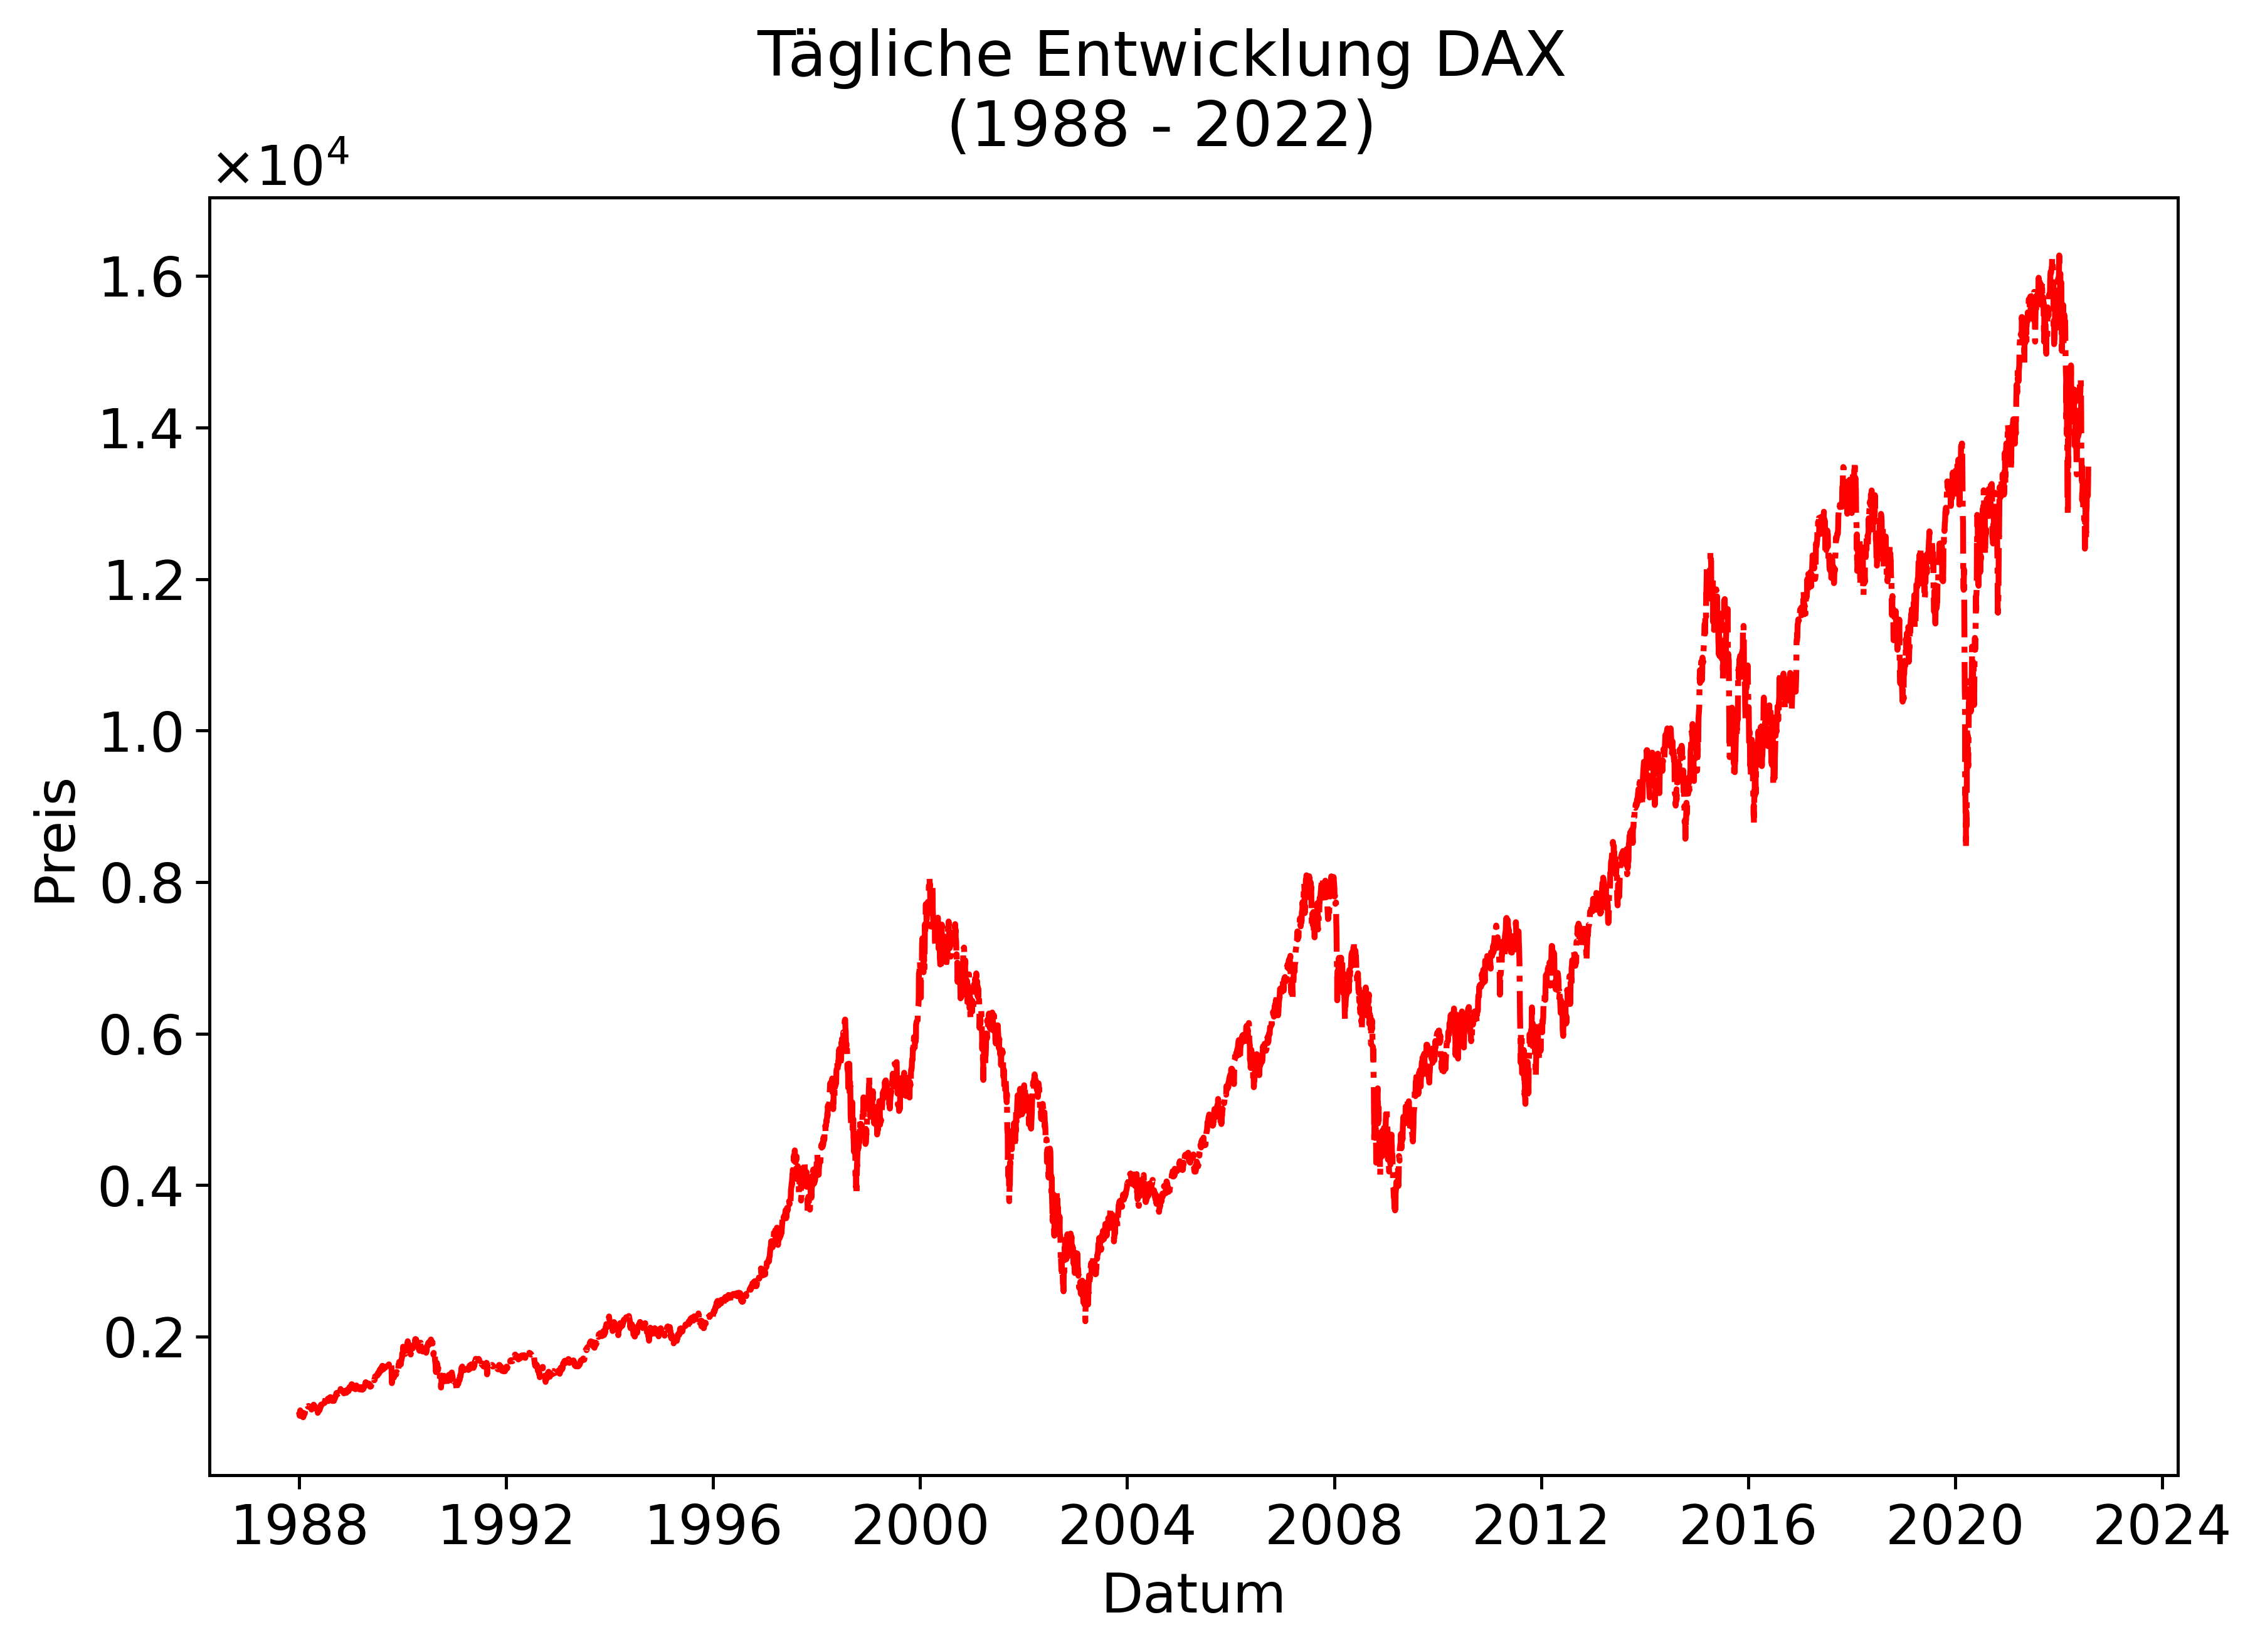

In [6]:
plot(data=data_dax, x="Datum", y="Preis", 
     colors="red",
     title="Tägliche Entwicklung DAX\n(1988 - 2022)",
     show_legend=False);

Mit der Funktion `plot` können wir die Daten visualisieren, d.h. Graphen bzw. Plots daraus generieren. Wir müssen dafür nur die Datenquelle (hier: `dax_data`) und die X- sowie die Y-Achse angeben ("Datum" und "Preis").  Optional haben wir noch angegeben, dass die Linie rot sein soll und der Plot eine Überschrift, aber keine Legende haben soll. 

Die Entwicklung - wir können diese mit Charts auf Finanzportalen vergleichen - sieht plausibel aus. Wir haben offensichtlich die richtigen Daten von Yahoo heruntergeladen. 

Im nächsten Schritt müssen wir nun die Renditen berechnen, da wir diese für beide Ansätze - "Zurück in die Vergangenheit" und "historischer Zufall" - benötigen. Wir erstellen deshalb eine neue Spalte ("Rendite"), in der wir die tägliche Rendite (Hinweis: $r_t = \frac{P_t}{P_{t-1}} -1$) speichern. Dies können wir z.B. mit der Funktion `pct_change` berechnen. 

In [7]:
data_dax = (data_dax
            .assign(Rendite=data_dax["Preis"].pct_change()) # Erstelle neue Spalte "Rendite"
            .dropna() # Entferne NaN-Spalten, da für ersten Kurs kein Vorkurs existiert
            .drop(columns=["Datum", "Preis"]) # Spalten Datum und Preis werden nicht mehr benötigt
            .assign(Periode=lambda _df: range(1,len(_df)+1)) # Periode der Investition (1 bis letzte Zeile)
            )
# Ergebnis anzeigen lassen (hier: erste 10 Zeilen)
data_dax.head(10)

,Rendite,Periode
3,-0.048449,1
4,0.041412,2
5,0.009949,3
6,0.008409,4
7,0.012046,5
8,-0.038152,6
9,-0.000638,7
10,-0.021401,8
11,0.008998,9
12,-0.022577,10


Wir fassen, was wir bisher berechnet haben in eine Funktion `calculate_returns` zusammen. Dies macht den Code übersichtlicher; insbesondere, wenn wir später ggf. Änderungen vornehmen möchten.

In [8]:
def calculate_returns(_df):
    data = (_df
            .filter(items=["Date", "Adj Close"], axis=1) # Filtern der benötigten Spalten
            .rename({"Date": "Datum", "Adj Close": "Preis"}, axis=1) # Umbenennen der Spaltennamen
            .dropna() # Fehlende Datenpunkte entfernen
            .assign(Rendite=lambda _data: _data["Preis"].pct_change()) # Erstelle neue Spalte "Rendite"
            .dropna() # Entferne NaN-Spalten, da für ersten Kurs kein Vorkurs existiert
            .drop(columns=["Datum", "Preis"]) # Spalten Datum und Preis werden nicht mehr benötigt
            .assign(Periode=lambda _data: range(1,len(_data)+1)) # Periode der Investition (1 bis letzte Zeile)
            .reset_index(drop=True)
            )
    return data

Wir können jetzt alles zusammenfassen:

In [9]:
data_dax = get_stock_data(ticker="^GDAXI", start="30-12-1987", end="31-07-2022")
data_dax = (data_dax
           .pipe(calculate_returns)
           )
data_dax.head()

,Rendite,Periode
0,-0.048449,1
1,0.041412,2
2,0.009949,3
3,0.008409,4
4,0.012046,5


### Ansatz 1: Zurück in die Vergangenheit

Im ersten Ansatz haben wir uns überlegt, dass wir für jeden Tag, an dem wir hätten investieren können (implizite Annahme: zu adjustierten Schlusskursen) untersuchen, wie diese Investition sich über die Zeit entwickelt hätte. Dafür müssen wir uns die Renditen für jeden Tag genauer anschauen. 

```{admonition} Beispiel für drei Anlagen
:class: tip

**Beispiel 1:**
Hätten wir bspw. am Handelstag vor dem 4.1.1988 investiert, dann hätten wir nach dem ersten vollen Handelstag eine Rendite von $(10-0.0484) - 1$ gemacht. Nach zwei Tagen hätten wir eine Rendite von $(1-0.0484)\times(1+0.0414) - 1 \ldots$ usw.

**Beispiel 2:**
Hätten wir bspw. am Handelstag vor dem 5.1.1988 investiert, dann hätten wir nach dem ersten vollen Handelstag eine Rendite von $(1+0.0414) - 1$ gemacht. Nach zwei Tagen hätten wir eine Rendite von $(1+0.0414)\times(1+0.0099) - 1\ldots$ usw.

**Beispiel 3:**
Hätten wir bspw. am Handelstag vor dem 6.1.1988 investiert, dann hätten wir nach dem ersten vollen Handelstag eine Rendite von $(1+0.0099) - 1$ gemacht. Nach zwei Tagen hätten wir eine Rendite von $(1+0.0099)\times(1+0.0084) - 1\ldots$ usw.
```

Jede Anlage beginnt also immer genau einen Tag später. Der Anfangszeitpunkt ist somit immer .genau eine Zeile später. Dies können wir in Python sehr einfach abbilden. 

Untenstehend ein Beispiel für unsere drei Beispielanlagen:

In [10]:
beispiel = (data_dax
            .assign(Anlage1=data_dax["Rendite"].shift(0),  # Renditen für Startdatum 5.1.1988
                    Anlage2=data_dax["Rendite"].shift(-1), # Renditen für Startdatum 6.1.1988
                    Anlage3=data_dax["Rendite"].shift(-2)) # Renditen für Startdatum 7.1.1988
            )
beispiel

,Rendite,Periode,Anlage1,Anlage2,Anlage3
0,-0.048449,1,-0.048449,0.041412,0.009949
1,0.041412,2,0.041412,0.009949,0.008409
2,0.009949,3,0.009949,0.008409,0.012046
3,0.008409,4,0.008409,0.012046,-0.038152
4,0.012046,5,0.012046,-0.038152,-0.000638
...,...,...,...,...,...
8732,-0.003271,8733,-0.003271,-0.008583,0.005303
8733,-0.008583,8734,-0.008583,0.005303,0.008790
8734,0.005303,8735,0.005303,0.008790,0.015204
8735,0.008790,8736,0.008790,0.015204,NaN


Schauen wir uns den Programmcode an, dann sehen wir, dass wir für jedes weitere Startdatum die Spalte "Rendite" immer um eine Zeile versetzen (engl. "shift") müssen. 

Jedoch benötigen wir nicht die Renditen, sondern die kumulierten Produkte (engl. cumulative product) der Renditen, d.h.:

$$(1+r_t)\times(1+r_{t+1})\ldots\times(1+r_{t+N}) - 1 = \ldots$$ 

Dafür müssen wir den obigen Programmcode nur geringfügig verändern:

In [11]:
beispiel = (data_dax
            .assign(Anlage1=(1 + data_dax["Rendite"].shift(0)).cumprod() - 1,  # kum. Produkt der Renditen für Startdatum 5.1.1988
                    Anlage2=(1 + data_dax["Rendite"].shift(-1)).cumprod() - 1, # kum. Produkt der Renditen für Startdatum 6.1.1988
                    Anlage3=(1 + data_dax["Rendite"].shift(-2)).cumprod() - 1)  # kum. Produkt der Renditen für Startdatum 7.1.1988
            )
beispiel

,Rendite,Periode,Anlage1,Anlage2,Anlage3
0,-0.048449,1,-0.048449,0.041412,0.009949
1,0.041412,2,-0.009043,0.051773,0.018442
2,0.009949,3,0.000816,0.060617,0.030710
3,0.008409,4,0.009232,0.073393,-0.008614
4,0.012046,5,0.021389,0.032442,-0.009246
...,...,...,...,...,...
8732,-0.003271,8733,12.142113,12.692699,12.217930
8733,-0.008583,8734,12.029308,12.765309,12.334114
8734,0.005303,8735,12.098399,12.886304,12.536844
8735,0.008790,8736,12.213532,13.097429,NaN



Nun ist es natürlich sehr mühsam, diesen Vorgang für alle möglichen Startzeitpunkte (d.h. 8734x) zu wiederholen. Glücklicherweise müssen wir dies auch nicht, sondern können diesen Vorgang automatisieren via Python[^3].

Bevor wir dies tun, sollten wir jedoch noch eine Mindestlaufzeit definieren, für die unsere Anlagen laufen müssen, um berücksichtigt zu werden. Ansonsten haben unsere letzten Anlagen nur wenige Datenpunkte; z.B. hätte eine Anlage mit den Startpunkt 28.7.2022 nur einen Datenpunkt.

Wir nehmen deshalb an, dass wir für mindestens 1000 Handelstage - d.h. ca. 5 Jahre - investieren möchten.

[^3]: Sie können sich an dieser Stelle bereits merken, dass repetitive Vorgänge im Programmiercode im Grunde nicht vorkommen sollten, da diese nahezu immer automatisiert werden können. Dies werden wir in den nächsten Kapiteln noch lernen. 

Hier folgt der Code für

In [12]:
def calculate_cumreturns_hist(data, min_laufzeit):
    '''Funktion, um kumulierte Renditen aller Anlagen zu berechnen
    
    Input: 
    - data: Datensatz, mit Renditedaten
    - min_laufzeit: Angabe über Mindestlaufzeit einer Anlage

    Output: Dataframe mit Daten aus "data" und Renditedaten für jede Anlage
    '''

    ## Vorarbeiten
    rows = len(data) # Anzahl Zeilen im Datensatz
    data_new = data.copy() # Erstelle Kopie des Datensatz, um bei Fehlern Daten nicht zu überschreiben

    ## Berechne Renditen aller Anlagen, die Kriterium min_laufzeit erfüllen
    anlagen = {f"Anlage_{i+1}":(data_new["Rendite"].shift(-i))
                           for i in range(0,rows-min_laufzeit)} # Berechne Renditen alle Anlagen
    anlagen = pd.DataFrame(anlagen) # Speicher Anlagen in Dataframe
    
    ## Berechne kumulierte Rendite
    anlagen = (1+anlagen).cumprod() - 1

    ## Verbinde ursprüngliche Daten mit neuen Anlagen-Daten
    data_combined = pd.concat((data_new, anlagen), axis=1).reset_index(drop=True) 
    
    ## Gib Daten aus
    return data_combined#.reset_index(drop=True)

Den obigen Programmcode nutzen wir nun, um einen neuen Dataframe zu erstellen, in dem das kumulierte Produkt der Renditen aller Anlagen berechnet wurde. 

In [13]:
min_t = 1000
data_anlagen = (data_dax
                .pipe(calculate_cumreturns_hist, min_laufzeit=min_t) # Berechne Renditen aller Anlagen
               )
data_anlagen.head(10)

,Rendite,Periode,Anlage_1,Anlage_2,Anlage_3,Anlage_4,Anlage_5,Anlage_6,Anlage_7,Anlage_8,...,Anlage_7728,Anlage_7729,Anlage_7730,Anlage_7731,Anlage_7732,Anlage_7733,Anlage_7734,Anlage_7735,Anlage_7736,Anlage_7737
0,-0.048449,1,-0.048449,0.041412,0.009949,0.008409,0.012046,-0.038152,-0.000638,-0.021401,...,0.005534,-0.001391,0.003967,-0.001158,0.003370,-0.019861,-0.005281,0.000011,-0.015848,0.006097
1,0.041412,2,-0.009043,0.051773,0.018442,0.020556,-0.026566,-0.038765,-0.022025,-0.012595,...,0.004135,0.002571,0.002804,0.002207,-0.016558,-0.025037,-0.005270,-0.015837,-0.009847,0.003909
2,0.009949,3,0.000816,0.060617,0.030710,-0.018380,-0.027187,-0.059336,-0.013225,-0.034887,...,0.008119,0.001409,0.006183,-0.017697,-0.021752,-0.025027,-0.021034,-0.009837,-0.012001,0.013836
3,0.008409,4,0.009232,0.073393,-0.008614,-0.019006,-0.048005,-0.050872,-0.035503,0.016456,...,0.006951,0.004784,-0.013800,-0.022885,-0.021741,-0.040478,-0.015066,-0.011991,-0.002231,0.018209
4,0.012046,5,0.021389,0.032442,-0.009246,-0.040000,-0.039439,-0.072300,0.015807,-0.006799,...,0.010344,-0.015172,-0.019008,-0.022874,-0.037245,-0.034627,-0.017208,-0.002220,0.002073,0.018309
5,-0.038152,6,-0.017579,0.031783,-0.030449,-0.031362,-0.061125,-0.022947,-0.007433,-0.026801,...,-0.009722,-0.020373,-0.018998,-0.038360,-0.031374,-0.036727,-0.007489,0.002084,0.002171,0.016655
6,-0.000638,7,-0.018206,0.009702,-0.021725,-0.053230,-0.011178,-0.045301,-0.027422,-0.038150,...,-0.014952,-0.020363,-0.034545,-0.032496,-0.033482,-0.027202,-0.003208,0.002181,0.000543,0.019034
7,-0.021401,8,-0.039216,0.018787,-0.043811,-0.002863,-0.033801,-0.064528,-0.038764,-0.020681,...,-0.014941,-0.035888,-0.028658,-0.034601,-0.023924,-0.023005,-0.003111,0.000553,0.002885,0.030856
8,0.008998,9,-0.030571,-0.004213,0.007058,-0.025676,-0.053259,-0.075437,-0.021306,-0.024582,...,-0.030552,-0.030009,-0.030771,-0.025054,-0.019713,-0.022910,-0.004730,0.002895,0.014519,0.029961
9,-0.022577,10,-0.052458,0.048762,-0.015982,-0.045298,-0.064300,-0.058645,-0.025205,-0.018877,...,-0.024641,-0.032119,-0.021186,-0.020849,-0.019618,-0.024497,-0.002401,0.014530,0.013638,0.032777


Als Ergebnis sehen wir einen Datensatz, der die kumulierten Produkte der Renditen von Anlage 1 bis Anlage 7737 beinhaltet.  Diesen können wir mithilfe des folgenden Programmcode auch graphisch Darstellen.

In [46]:
def plot_anlagen(data):
    '''Funktion, um Anlagen zu Plotten
    
    Hinweis: Hilfefunktion, da `plot`-Funktion ansonsten zu lange rechnet

    '''
    data_plot = data.filter(like="Anlage").to_numpy()
    
    fig, ax = plt.subplots()
    plt.plot(data_plot, color="green", linewidth=0.025,alpha=0.05)
    ax.set_xlabel("Periode")
    ax.set_ylabel("Rendite der Anlage")
    fig.suptitle(f"Wertentwicklung aller Anlagen in DAX\n(Anlagezeitraum mindestens {min_t} Tage)", y=1.08)
    #ax.set_title(f"Wertentwicklung aller Anlagen in DAX\n(Anlagezeitraum mindestens {min_t} Tage)", y=1.08)

    xmin, xmax = ax.get_xlim()
    ax.hlines(0, xmin, xmax, colors="black", linestyles="--", label="Verlustlinie")
    ax.annotate("Verlustlinie", (xmax, 0.1), ha="right")
    return None

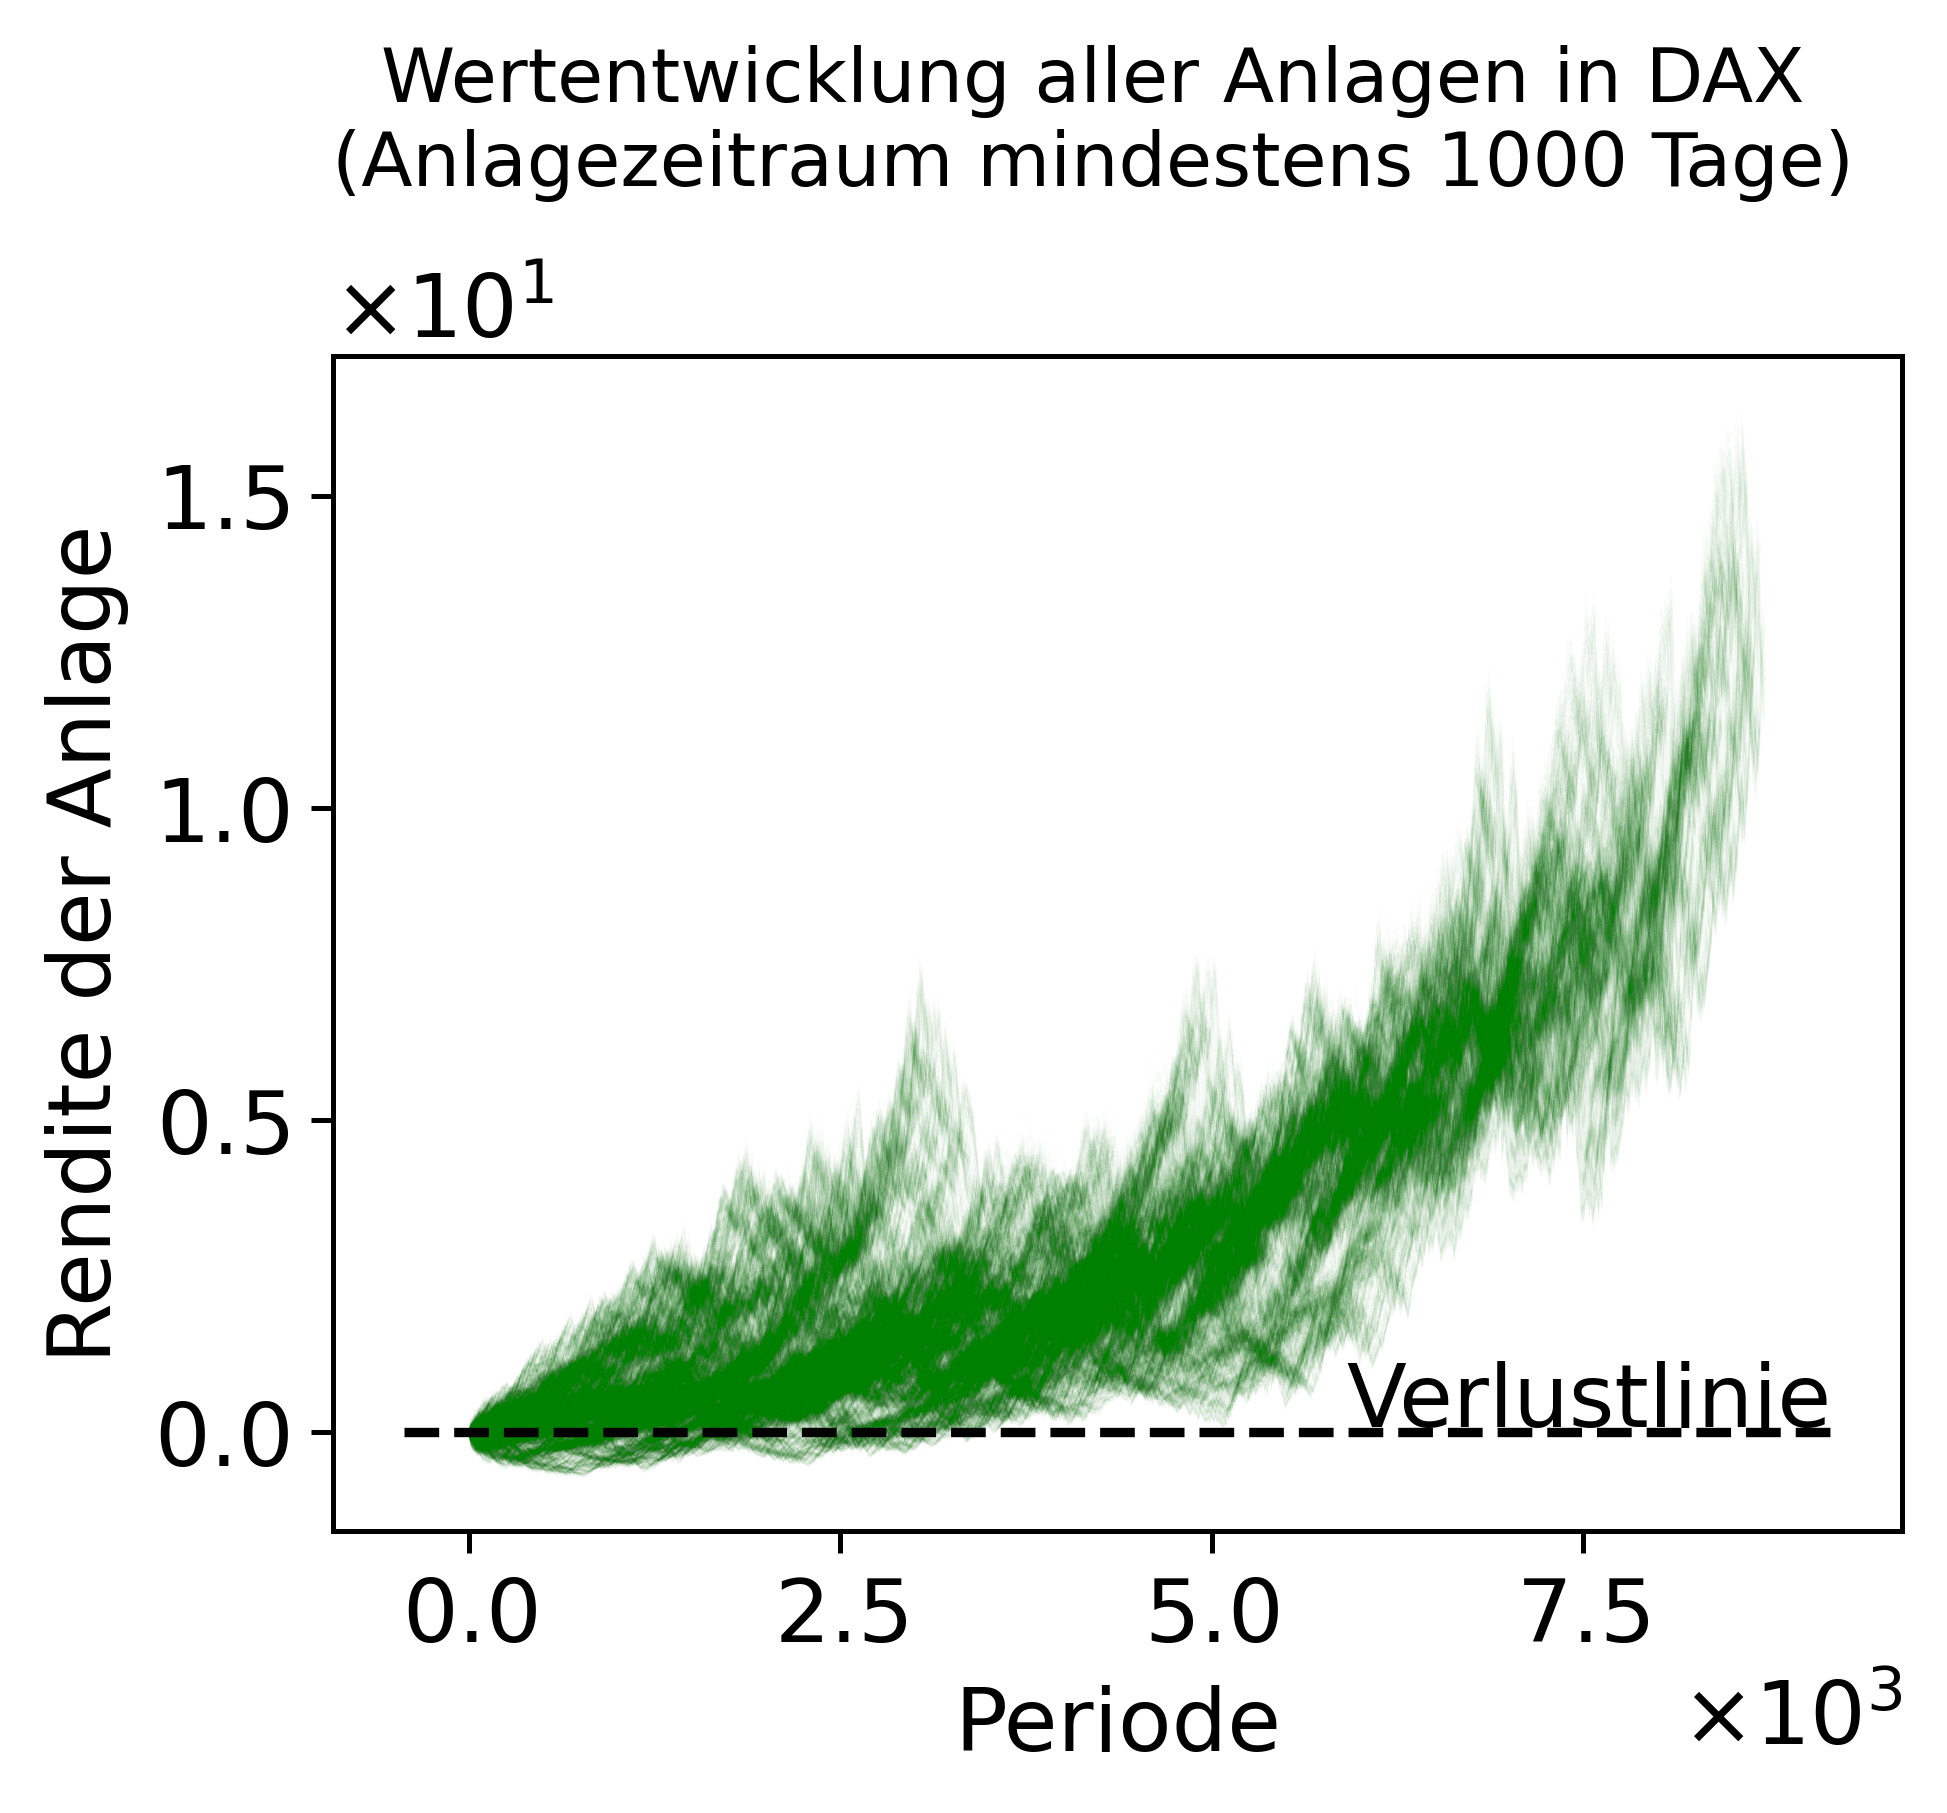

In [49]:
# Hinweis: die Berechnung kann ja nach Computer einige Minuten dauern
plot_anlagen(data_anlagen);

Wir sehen bereits, dass ca. ab Periode 4.000 keine Anlage (unabhängig vom Startpunkt) noch einen Verlust - d.h. Rendite von unter 0% - gemacht hat. Bevor wir die Verlustwahrscheinlichkeit nun aber konkret, wie im vorherigen Kapitel erläutert, berechnen, wollen wir unseren Programmcode nochmals strukturieren und zusammenfassen. Unsere bisherige Aufbereitung der Daten umfasste im Wesentlichen auf drei Schritte:

1. Herunterladen der Daten
1. Berechnung der Renditen
2. Berechnung der kumulierten Produkte der Renditen je Anlage

Diese drei Schritte fassen wir nun in drei Funktionen zusammen. In Summe macht dies den Code besser lesbarer und schneller adaptierbar, falls weitere Analysen hinzukommen sollten. 

In [16]:
min_t = 1000
data = (get_stock_data(ticker="^GDAXI", start="30-12-1987", end="31-07-2022") # Herunterladen der Daten
             .pipe(calculate_returns) # Berechnung der Renditen
             .pipe(calculate_cumreturns_hist, min_t) # Berechnung der kumulierten Renditen je Anlagestartpunkt
             )
data

,Rendite,Periode,Anlage_1,Anlage_2,Anlage_3,Anlage_4,Anlage_5,Anlage_6,Anlage_7,Anlage_8,...,Anlage_7728,Anlage_7729,Anlage_7730,Anlage_7731,Anlage_7732,Anlage_7733,Anlage_7734,Anlage_7735,Anlage_7736,Anlage_7737
0,-0.048449,1,-0.048449,0.041412,0.009949,0.008409,0.012046,-0.038152,-0.000638,-0.021401,...,0.005534,-0.001391,0.003967,-0.001158,0.003370,-0.019861,-0.005281,0.000011,-0.015848,0.006097
1,0.041412,2,-0.009043,0.051773,0.018442,0.020556,-0.026566,-0.038765,-0.022025,-0.012595,...,0.004135,0.002571,0.002804,0.002207,-0.016558,-0.025037,-0.005270,-0.015837,-0.009847,0.003909
2,0.009949,3,0.000816,0.060617,0.030710,-0.018380,-0.027187,-0.059336,-0.013225,-0.034887,...,0.008119,0.001409,0.006183,-0.017697,-0.021752,-0.025027,-0.021034,-0.009837,-0.012001,0.013836
3,0.008409,4,0.009232,0.073393,-0.008614,-0.019006,-0.048005,-0.050872,-0.035503,0.016456,...,0.006951,0.004784,-0.013800,-0.022885,-0.021741,-0.040478,-0.015066,-0.011991,-0.002231,0.018209
4,0.012046,5,0.021389,0.032442,-0.009246,-0.040000,-0.039439,-0.072300,0.015807,-0.006799,...,0.010344,-0.015172,-0.019008,-0.022874,-0.037245,-0.034627,-0.017208,-0.002220,0.002073,0.018309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,-0.003271,8733,12.142113,12.692699,12.217930,12.202762,12.291719,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8733,-0.008583,8734,12.029308,12.765309,12.334114,12.403495,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8734,0.005303,8735,12.098399,12.886304,12.536844,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8735,0.008790,8736,12.213532,13.097429,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Schritt 4: Analyse für Ansatz 1

Schlussendlich wollen wir bestimmen, wie wahrscheinlich ein Verlust nach X Perioden. Im vorherigen Kapitel haben wir uns Gedanken dazu gemacht, wie wir dies berechnen können. Hierzu müssen wir für jeden Handelstag die Anzahl der Anlagen addieren, die eine Rendite von unter 0% gemacht haben und durch die Anzahl aller Anlagen teilen. 

Im Programmcode ist dies sehr einfach abzubilden:

In [17]:
def calculate_loss_probabilities(_data):
    data_new = (_data
            .assign(Verlustwahrscheinlichkeit=lambda _df: (_df.filter(like="Anlage", axis=1) < 0 ).sum(axis=1) / len(_df))
            )
    return data_new

In [18]:
data_final = calculate_loss_probabilities(data)

data_final[["Periode", "Verlustwahrscheinlichkeit"]]

,Periode,Verlustwahrscheinlichkeit
0,1,0.413529
1,2,0.400824
2,3,0.395330
3,4,0.390065
4,5,0.389722
...,...,...
8732,8733,0.000000
8733,8734,0.000000
8734,8735,0.000000
8735,8736,0.000000


An der Tabelle sehen wir, dass die Verlustwahrscheinlichkeit nach einem Tag bei ca. 40% liegt. Jedoch sehen wir, dass die Verlustwahrscheinlichkeit in den letzten Perioden 0% beträgt. D.h. in unserem Datensatz gab es z.B. keine Anlage, die nach 8733 Perioden noch eine Rendite von unter 0% gemacht hatte. Noch klarer wird die Berechnung, wenn wir die Verlustwahrscheinlichkeit plotten. 

In [19]:
def plot_verlustwahrscheinlichkeit(data):
     ax = plot(data=data, x="Periode", y="Verlustwahrscheinlichkeit",
          colors="red",
          title="historische Verlustwahrscheinlichkeit Anlage in DAX",
          show_legend=False);
     day0 = np.argmax(data["Verlustwahrscheinlichkeit"] == 0)
     loss = 0
     if day0 == 0:
          day0 = np.argmin(data["Verlustwahrscheinlichkeit"])
          loss = np.min(data["Verlustwahrscheinlichkeit"])
     day01 = np.argmin(np.abs(data["Verlustwahrscheinlichkeit"] - 0.1))
     ax.annotate(f"Tag {day0}: p = {np.round(loss*100,3)}%",xy=(day0,loss), xytext=(day0*0.9,loss+0.1), ha="left" , color="black", arrowprops=dict(arrowstyle= "-|>", color='black',ls='--'))
     ax.annotate(f"Tag {day01}: p = 10%",xy=(day01,0.1),xytext=(day01,0.15), ha="left" , color="black", arrowprops=dict(arrowstyle= "-|>", color='black',ls='--'))
     


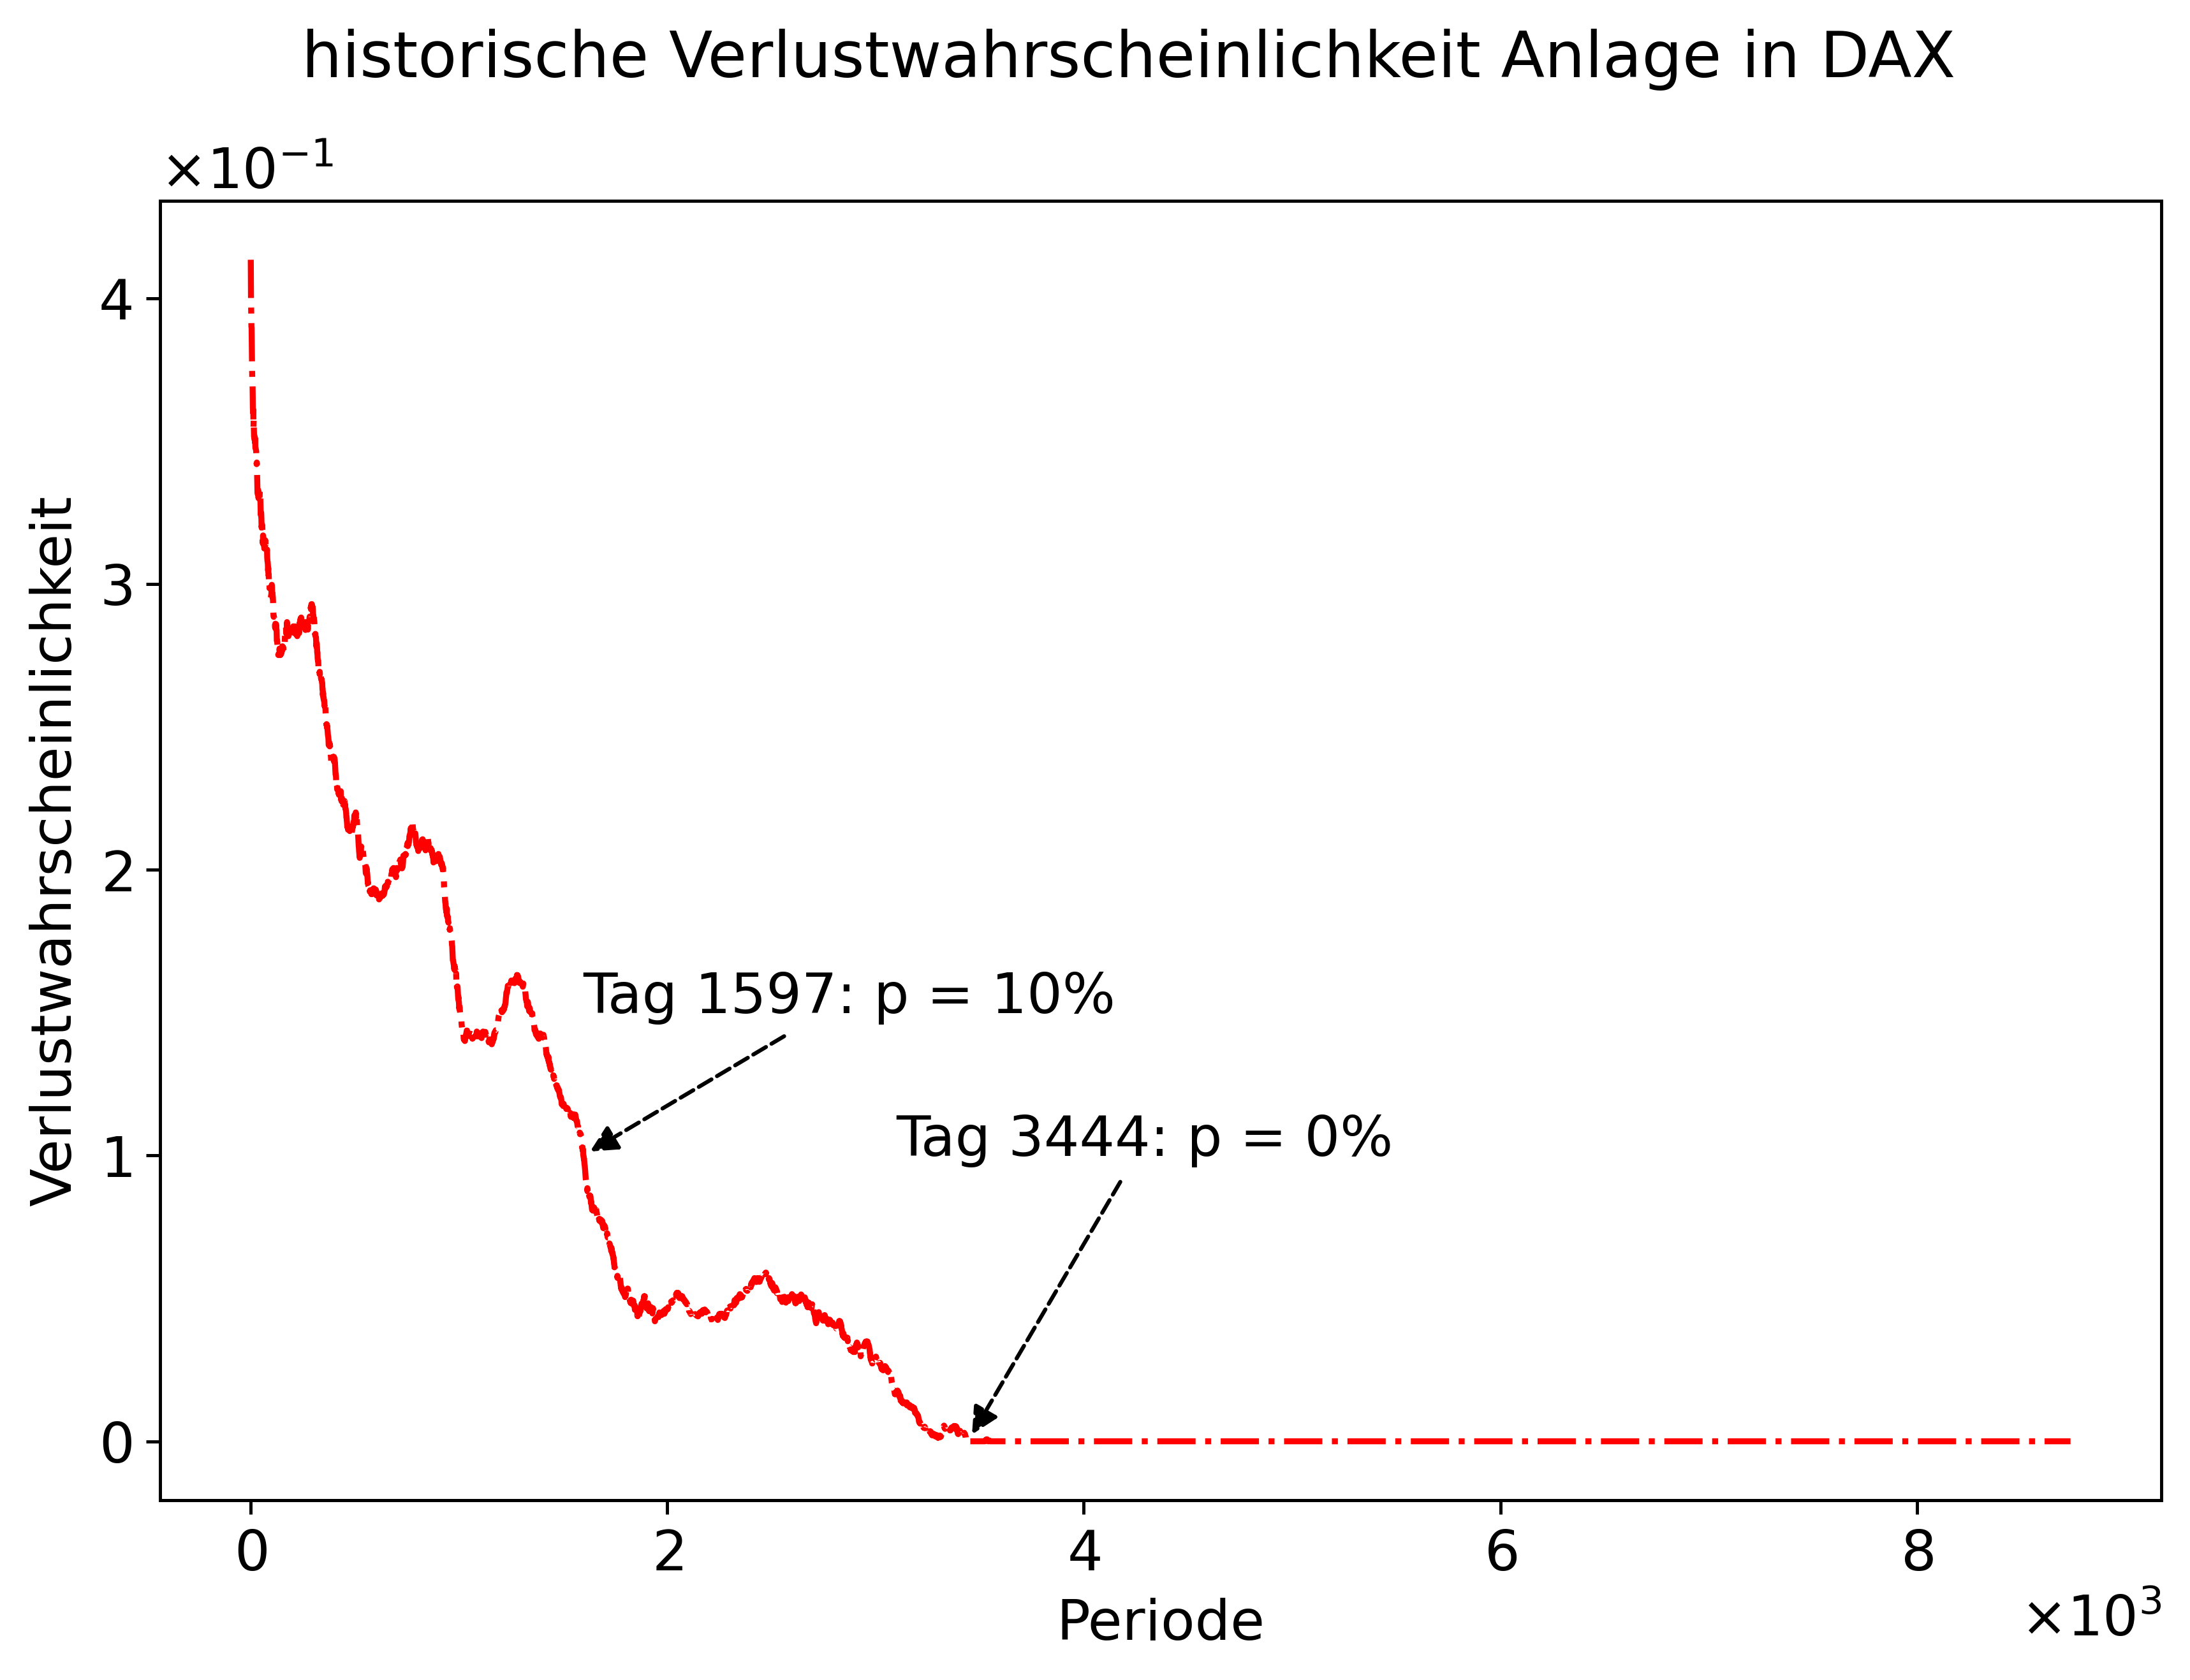

In [20]:
plot_verlustwahrscheinlichkeit(data_final);

### Fazit: Ansatz 1

Mit unserer empirischen Analyse konnten wir die Ausgangsfrage beantworten. Die Verlustwahrscheinlichkeit bei Investition in den DAX ist real. Allerdings beschränkt sich dies historische auf einen kurzen Anlagehorizont. So gab es auf Basis der historischen Daten keinen Zeitpunkt einer Anlage, bei der man nach mehr als 3.444 Tagen (ca. 17 Jahre) noch einen Verlust gemacht hätte. Selbst bei der Hälfte der Anlagedauer, d.h. nach ca. 9 Jahren, betrug die Verlustwahrscheinlichkeit nur noch 10%. 

Hat man einen langfristigen Investitionsansatz, so ist das Risiko einer Investition in den DAX deutlich geringer, als dies oft aus dem Bauch heraus angenommen wird.


```{admonition} Analyse basiert auf Annahmen!
:class: warning, dropdown
Wichtig ist an dieser Stelle jedoch zu betonen, dass die Analyse auf vielen Annahmen beruht. Einige davon können wir ändern, um zu schauen, wie sensitiv die Analyse auf diese Annahme reagiert (z.B. könnten wir auch den Tagestiefstpreis nehmen). Andere müssen wir aus Mangel an Alternativen so treffen, können jedoch  kritisch sein (z.B. basiert unsere Analyse auf Yahoo-Daten, die ggf. Fehler beinhaltet). Andere Annahmen sind grundsätzlicher Natur: wir basieren unsere Analyse auf historischen Daten und ziehen daraus Schlüsse für die Zukunft. Dies setzt voraus, dass die Kursentwicklungen in der Zukunft ähnlich sind, wie in der Vergangenheit. Jedoch kann die Zukunft auch ganz andere Entwicklungen beinhaltet, die wir so nicht vorhersehen (z.B. könnte die wirtschaftliche und politische Stellung Deutschlands sich in der Zukunft negativ entwickeln)
```

Wir haben feststellen können, dass es für die Analyse nicht viel Programmieraufwand bedarf. 

Hier ist die Zusammenfassung unserer Analyse:

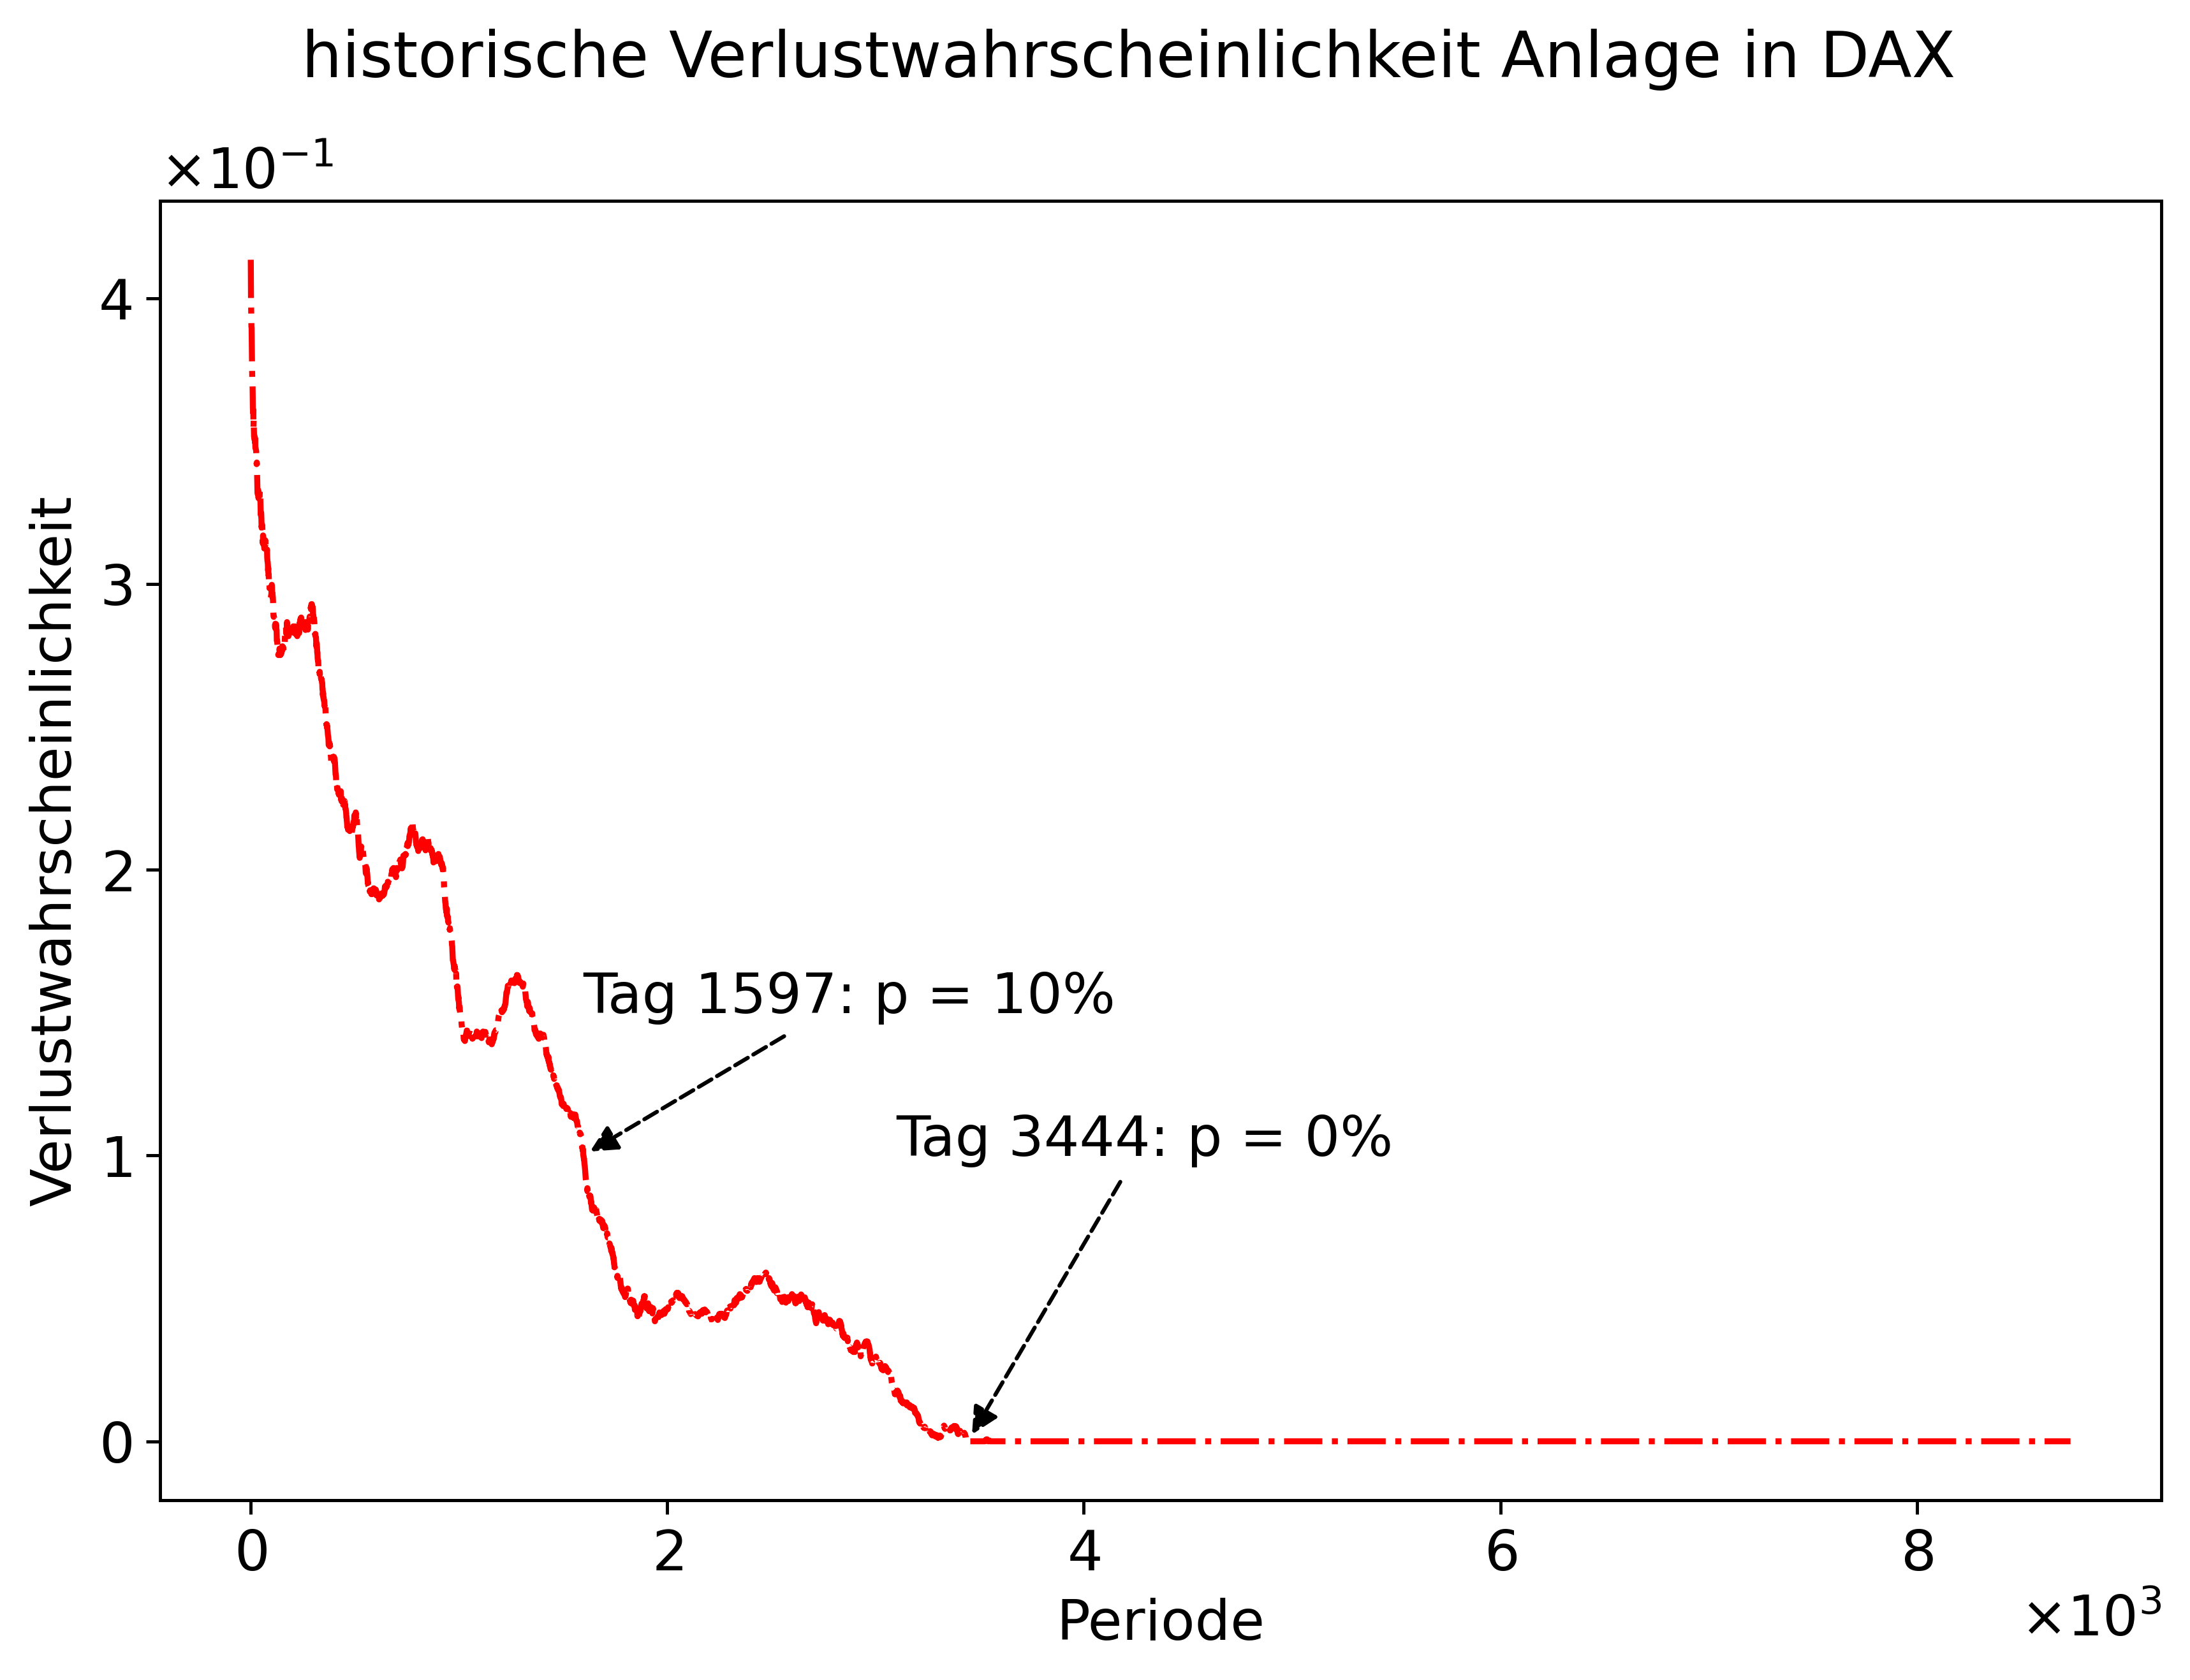

In [21]:
min_t = 1000
(get_stock_data(ticker="^GDAXI", start="30-12-1987", end="31-07-2022") # Herunterladen der Daten
    .pipe(calculate_returns) # Berechnung der Renditen
    .pipe(calculate_cumreturns_hist, min_t) # Berechnung der kumulierten Renditen je Anlagestartpunkt
    .pipe(calculate_loss_probabilities) # Berechnung der Verlustwahrscheinlichkeit
    .pipe(plot_verlustwahrscheinlichkeit) # Visualisierung der Analyse
)

Im weiteren Verlaufe werden wir uns anschauen, wie wir den Programmcode noch verbessern und lesbarer machen können. 

## Schritt 4: Historischer Zufall

Im vorherigen Kapitel haben wir uns zwei Varianten überlegt, wie wir die Ausgangsfrage beantworten können. Schauen wir uns nun an, wie wir die Frage mittels einer Zufallsauswahl der historischen Renditen beantworten können. Viele Veränderung benötigen wir hierfür nicht. Schauen wir uns den vorherigen Programmiercode an, so stellen wir fest, dass nur die Funktion `calculate_cumreturns_anlagen` verändert werden muss bzw. wir hierfür eine andere Funktion schreiben. 

```
min_t = 1000
(get_stock_data(ticker="^GDAXI", start="30-12-1987", end="31-07-2022") # Bleibt unverändert
    .pipe(calculate_returns) # Bleibt unverändert
    .pipe(calculate_cumreturns_hist, min_t) # Muss ersetzt werden durch neue Funktion
    .pipe(calculate_loss_probabilities) # Bleibt unverändert
    .pipe(plot_verlustwahrscheinlichkeit) # Bleibt unverändert
)
```


In [22]:
def calculate_cumrets_random(_df, n_anlagen, n_time):
    # Ziehe zufällig (n_time x n_anlagen) Renditen aus Spalte "Rendite"
    rnd_data = np.random.choice(_df["Rendite"], (n_time, n_anlagen), replace=True)
    
    # Speicher Daten in Dataframe
    anlagen = pd.DataFrame(rnd_data, columns = [f"Anlage_{i}" for i in range(1,n_anlagen+1)])
    
    ## Berechne kumulierte Rendite
    anlagen = (1+anlagen).cumprod() - 1

    ## Verbinde ursprüngliche Daten mit neuen Anlagen-Daten
    data_combined = pd.concat((_df, anlagen), axis=1).reset_index(drop=True) 
    
    ## Gib Daten aus
    return data_combined

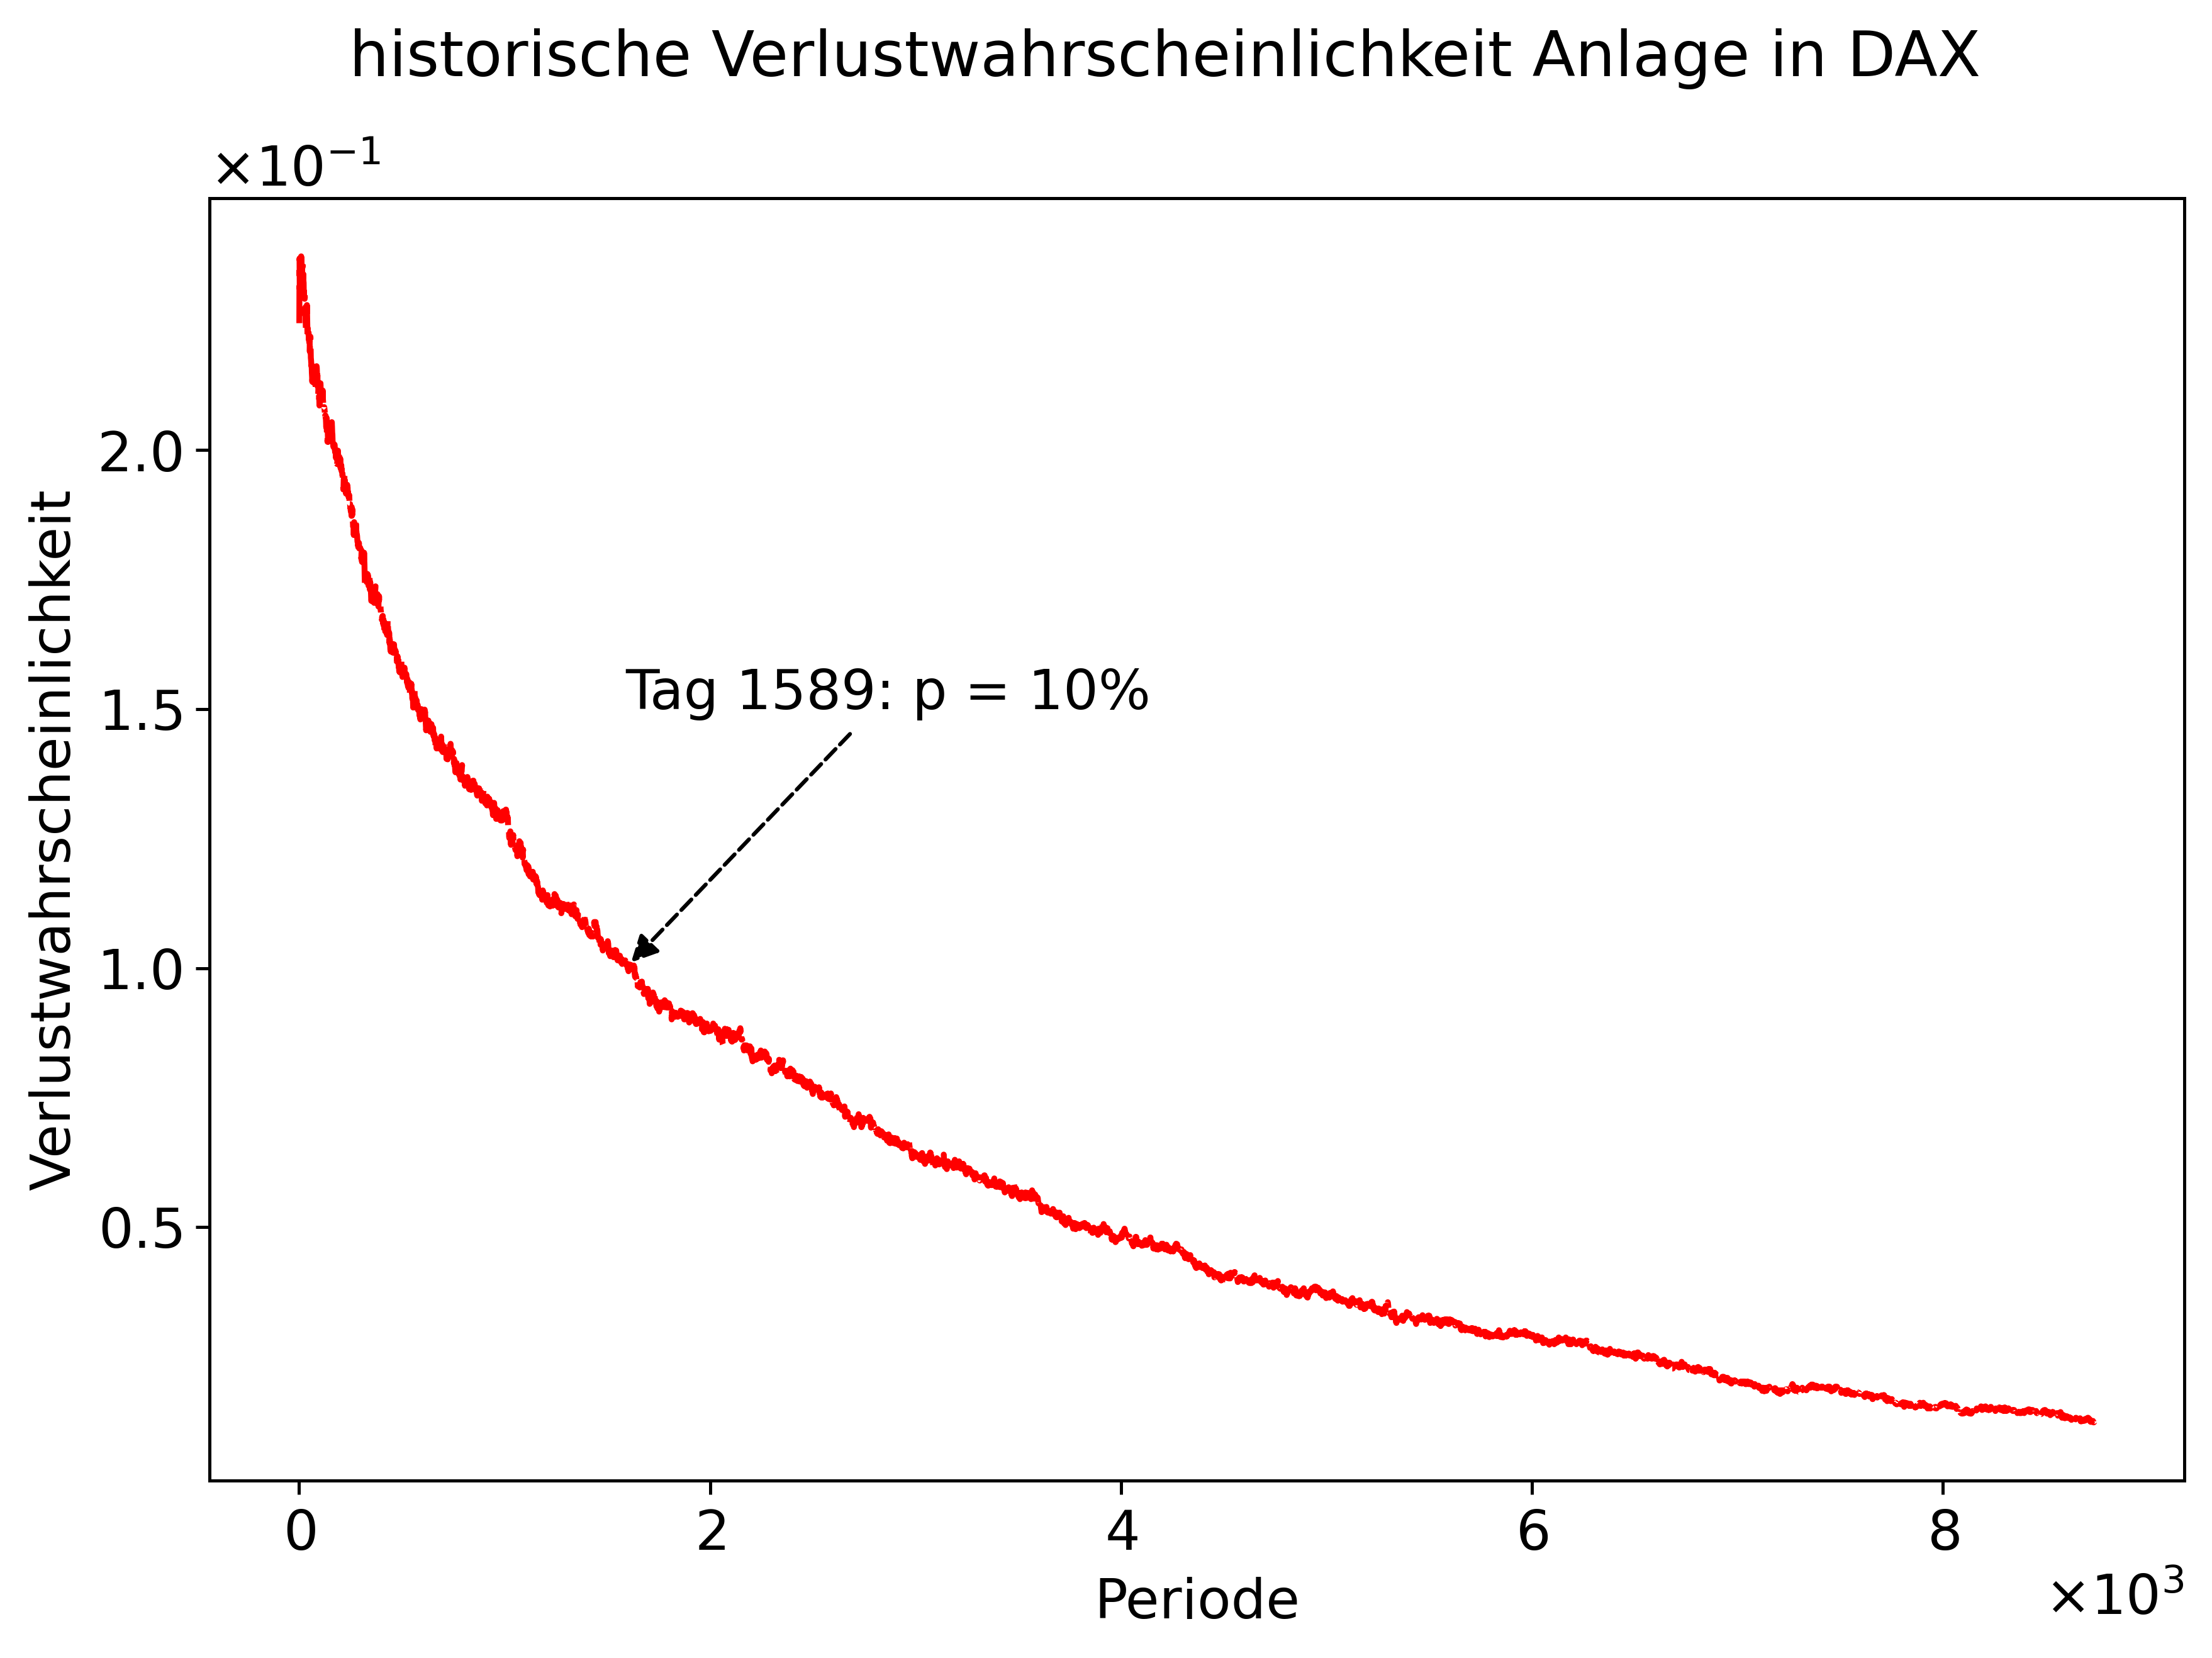

In [23]:
(get_stock_data(ticker="^GDAXI", start="30-12-1987", end="31-07-2022") # Bleibt unverändert
 .pipe(calculate_returns) # Unverändert
 .pipe(calculate_cumrets_random, n_anlagen=5000, n_time=10_000) # Berechne kumulierte Renditen auf Basis von Zufallsauswahl 
 .pipe(calculate_loss_probabilities) # Unverändert
 .pipe(plot_verlustwahrscheinlichkeit) # Unverändert
)


## Gesamtfazit

Wie bereits erläutert sollte Ihnen diese Fallstudie einen Eindruck davon vermitteln, was Business Analytics umfasst. Wir haben gesehen, dass ein großer Teil dessen, was wir gemacht haben unabhängig war von operativer Datenanalyse. Zunächst mussten wir die konkrete Frage formulieren und uns detaillierte Gedanken dazu machen, wie wir diese Frage beantworten könnten. Erst im zweiten Schritt haben wir uns dann an die eigentliche Datenanalyse gemacht. Dies zeigt, dass die Nutzung von Tools oder einer Programmiersprache nur Mittel zum Zweck ist. Wir nutzen ein Werkzeug, um ein analytisches Problem zu lösen. 

In unserem Falle haben wir **Python** genutzt. Auch wenn vieles von dem, was hier dargestellt wurde neu und noch nicht zu 100% nachvollziehbar ist, sollte diese Fallstudie dennoch einen Eindruck davon vermitteln, wie Datenanalyse in der Praxis aussieht und welche Schritte dafür nötig sind. 

Widmen wir uns nun Python und schauen uns in den nächsten Kapiteln an, wie Python konkret funktioniert. 